In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

<Axes: >

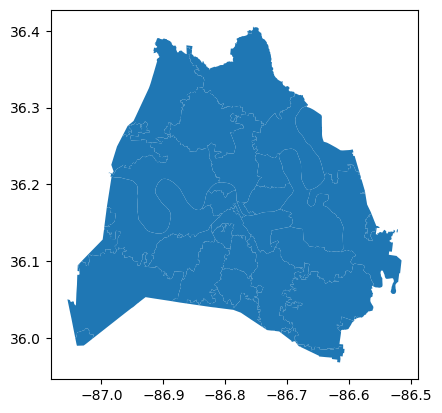

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes.plot()

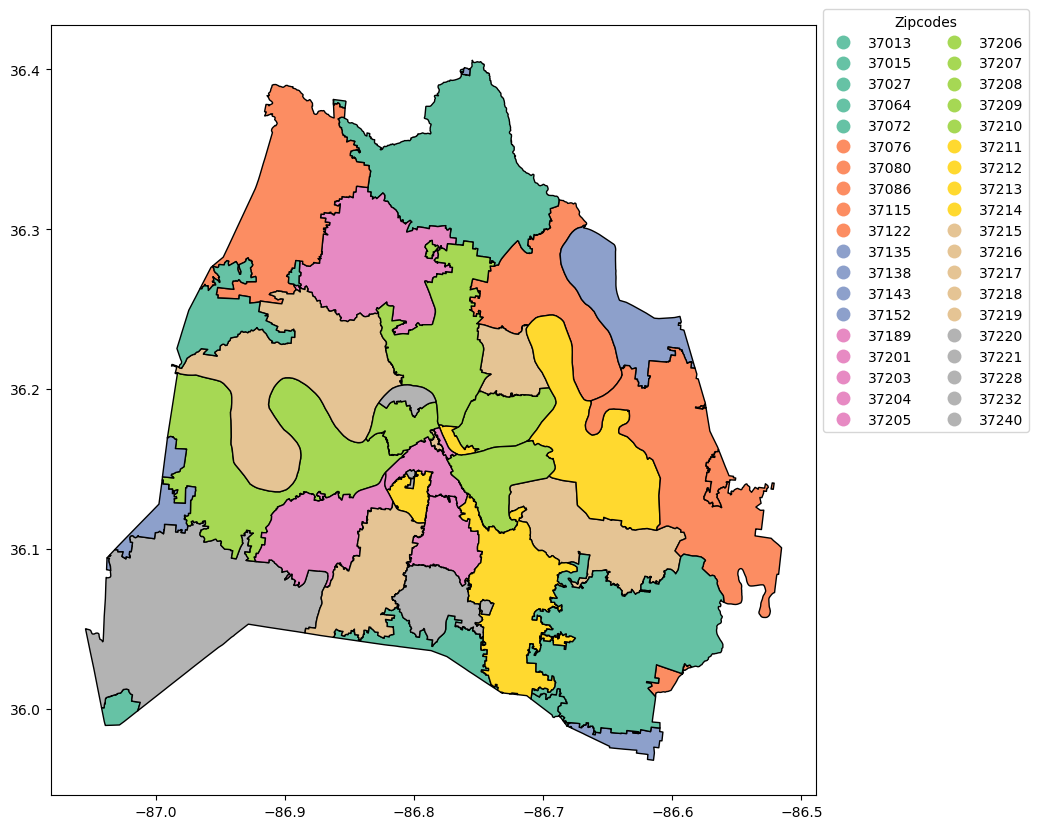

In [3]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [4]:
parks = gpd.read_file('../data/Parks_view.geojson')

In [5]:
parks.head()

,OBJECTID,Name,PARK_ID,Latitude,Longitude,YearEstablished,Acres,DaysOpen,Hours,Phone,...,FootballMultipurpose,CanoeLaunch,CommunityGarden,CommonName,Classification,City,State,ZipCode,GlobalID,geometry
0,142220,Harpeth River Park,PARK_169,36.077382,-86.959221,1988,69.860000,Daily,Dawn to 11 pm,(615) 797-6096,...,Yes,Yes,No,Harpeth River Park,Specialty,Nashville,TN,37221,dc4f081c-31e8-41e0-8d56-b981900a44f6,"POLYGON ((1686161.600 636922.600, 1686068.700 ..."
1,142221,Harpeth Knoll Park,PARK_44,36.059428,-86.938155,1972,9.880000,Daily,Dawn to 11 pm,(615) 862-8400,...,No,No,No,Harpeth Knoll Park,Neighborhood,Nashville,TN,37221,091033af-10f8-433c-876b-c789dee970fc,"POLYGON ((1691081.000 630129.600, 1691425.800 ..."
2,142222,Bellevue Park,PARK_49,36.071597,-86.933545,1982,17.140000,Daily,Dawn to 11 pm,(615) 862-8400,...,No,No,No,Red Caboose Park,Neighborhood,Nashville,TN,37221,506a7c23-64a3-4e9a-b9d8-be4b4e1006db,"POLYGON ((1693040.200 633304.000, 1692814.600 ..."
3,142223,Bells Bend Park,PARK_50,36.150169,-86.926463,2007,809.590000,"Daily, Center: Tuesday -Saturday",Dawn to Dusk,(615) 862-4187,...,No,No,No,Bells Bend Park,Regional,Nashville,TN,37218,5bf61379-8a08-47cd-bb13-4c06655a8d11,"POLYGON ((1691053.800 666591.200, 1692505.000 ..."
4,142224,Alvin G. Beaman Park,PARK_88,36.260758,-86.919842,1996,2170.892186,"Daily, Center: Tuesday -Saturday",Dawn to 11 pm,(615) 299-9586,...,No,No,No,Beaman Park,Regional,Joelton,TN,37080,62a069cc-8f0f-4f70-b8c8-789620680298,"MULTIPOLYGON (((1702119.400 707476.800, 170212..."


<Axes: >

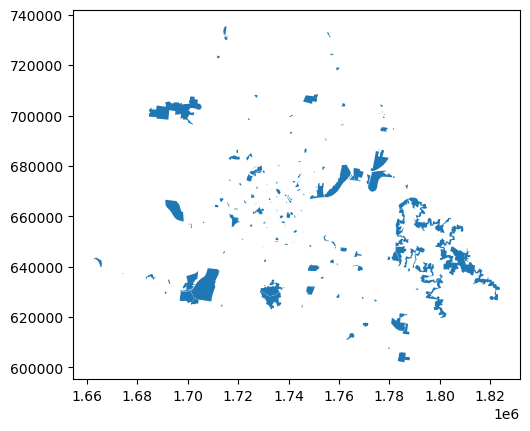

In [89]:
parks.plot()

In [6]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
parks_geo = gpd.GeoDataFrame(parks, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(parks.Longitude, parks.Latitude))

In [8]:
type(parks)

geopandas.geodataframe.GeoDataFrame

In [9]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [10]:
parks_by_zip = gpd.sjoin(parks_geo, zipcodes, predicate = 'within')

In [11]:
parks_by_zip

,OBJECTID,Name,PARK_ID,Latitude,Longitude,YearEstablished,Acres,DaysOpen,Hours,Phone,...,CommonName,Classification,City,State,ZipCode,GlobalID,geometry,index_right,zip,po_name
0,142220,Harpeth River Park,PARK_169,36.077382,-86.959221,1988,69.860000,Daily,Dawn to 11 pm,(615) 797-6096,...,Harpeth River Park,Specialty,Nashville,TN,37221,dc4f081c-31e8-41e0-8d56-b981900a44f6,POINT (-86.95922 36.07738),7,37221,NASHVILLE
1,142221,Harpeth Knoll Park,PARK_44,36.059428,-86.938155,1972,9.880000,Daily,Dawn to 11 pm,(615) 862-8400,...,Harpeth Knoll Park,Neighborhood,Nashville,TN,37221,091033af-10f8-433c-876b-c789dee970fc,POINT (-86.93816 36.05943),7,37221,NASHVILLE
2,142222,Bellevue Park,PARK_49,36.071597,-86.933545,1982,17.140000,Daily,Dawn to 11 pm,(615) 862-8400,...,Red Caboose Park,Neighborhood,Nashville,TN,37221,506a7c23-64a3-4e9a-b9d8-be4b4e1006db,POINT (-86.93354 36.07160),7,37221,NASHVILLE
3,142223,Bells Bend Park,PARK_50,36.150169,-86.926463,2007,809.590000,"Daily, Center: Tuesday -Saturday",Dawn to Dusk,(615) 862-4187,...,Bells Bend Park,Regional,Nashville,TN,37218,5bf61379-8a08-47cd-bb13-4c06655a8d11,POINT (-86.92646 36.15017),27,37218,NASHVILLE
4,142224,Alvin G. Beaman Park,PARK_88,36.260758,-86.919842,1996,2170.892186,"Daily, Center: Tuesday -Saturday",Dawn to 11 pm,(615) 299-9586,...,Beaman Park,Regional,Joelton,TN,37080,62a069cc-8f0f-4f70-b8c8-789620680298,POINT (-86.91984 36.26076),20,37080,JOELTON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,142655,Green Hills Park,PARK_39,36.095373,-86.804840,1973,13.030000,Daily,Dawn - Dusk,(615) 862-8400,...,Green Hills Park,Neighborhood,Nashville,TN,37215,7998fa7e-2178-4a52-9e02-b54ae425ffc7,POINT (-86.80484 36.09537),44,37215,NASHVILLE
194,142656,"Kossie Gardner, Sr. Park",PARK_223,36.170641,-86.803494,2020,0.340000,Daily,Dawn - Dusk,(615) 862-8400,...,Kossie Gardner Park,Pocket,Nashville,TN,37208,2466db2f-b4a6-4c18-a351-d7e03524fef7,POINT (-86.80349 36.17064),40,37208,NASHVILLE
195,142677,Kirkpatrick Park,PARK_18,36.168324,-86.753914,1963,3.830000,"Daily, Center: Monday-Friday",Dawn to 11 pm,(615) 862-8400,...,KIRKPATRICK,Neighborhood,Nashville,TN,37206,f0423098-57e5-456b-9850-7c92356e602f,POINT (-86.75391 36.16832),13,37206,NASHVILLE
196,142679,Bicentennial Park,PARK_220,36.165860,-86.776149,1977,3.490000,Daily,Dawn to 11 pm,(615)862-8400,...,Bicentennial,Pocket,Nashville,TN,37201,103f032d-14c0-434d-9a8b-956229fafcc1,POINT (-86.77615 36.16586),36,37201,NASHVILLE


In [12]:
parks_by_zip['zip'].value_counts()

zip
37203    11
37211    11
37209     9
37207     9
37206     9
37013     9
37138     9
37208     8
37221     7
37218     7
37204     6
37217     6
37076     5
37201     5
37215     4
37214     3
37072     3
37080     3
37212     3
37210     3
37205     2
37216     2
37115     2
37228     2
37189     1
37220     1
37027     1
37219     1
37213     1
Name: count, dtype: int64

In [84]:
parks_in_37203 = parks_by_zip.loc[parks_by_zip['zip'] == '37203']
                 
parks_in_37203.shape

(11, 57)

In [14]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

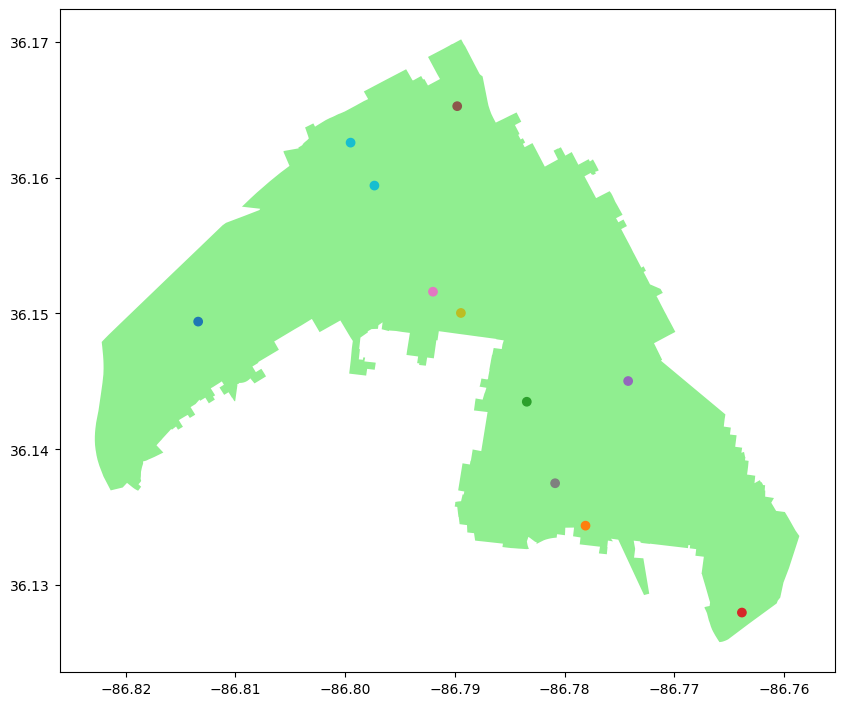

In [15]:
ax = polygon37203.plot(figsize = (10, 10), color = 'lightgreen')
parks_in_37203.plot( ax = ax, column = 'Name');
plt.show();

In [16]:
polygon37203.geometry.centroid

C:\Users\Jasmine\AppData\Local\Temp\ipykernel_1244\651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


35    POINT (-86.78899 36.14860)
dtype: geometry

In [17]:
center = polygon37203.geometry.centroid[35]
print(center)

POINT (-86.7889889966741 36.14860232841574)


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_1244\4090195936.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[35]


In [18]:
area_center = [center.y, center.x]

In [19]:
print(area_center)

[np.float64(36.14860232841574), np.float64(-86.7889889966741)]


In [20]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)
map_37203

In [21]:
i = 0
for row_index, row_values in parks_in_37203.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 28
values are:
 
OBJECTID                                                           142248
Name                                                      Centennial Park
PARK_ID                                                           PARK_26
Latitude                                                          36.1494
Longitude                                                      -86.813403
YearEstablished                                                      1903
Acres                                                              125.14
DaysOpen                                   Daily, Center: Monday-Saturday
Hours                                                       Dawn to 11 pm
Phone                                                      (615) 862-8400
Webstie                 http://nashville.gov/Parks-and-Recreation/Park...
Address                                                 2500 West End Ave
Restroom                                                              Yes
CommunityCen

In [39]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

In [87]:
for row_index, row_values in parks_in_37203.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Name']), ('Acres:'),float( row_values['Acres']),('Baseball:'), str(row_values['Baseball']),('DogPark:'),str(row_values['DogPark']),('Lake:'),str(row_values['Lake'])    
  
    icon=folium.Icon(color="blue",icon="tree", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')

In [88]:
map_37203